# Modelo Normal Multivariado

Juan Sosa PhD

Email: jcsosam@unal.edu.co

GitHub: https://github.com/jstats1702

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

from matplotlib.lines import Line2D
from scipy.stats import gamma
from scipy.stats import norm
from scipy.stats import multivariate_normal
from scipy.stats import wishart
from scipy.special import gammaln
from tabulate import tabulate
from numpy.linalg import inv
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

# Introducción

El modelo Normal multivariado para **variables multivariadas** $\boldsymbol{y}_1, \ldots, \boldsymbol{y}_n$, donde $\boldsymbol{y}_i = (y_{i,1}, \ldots, y_{i,p}) \in \mathbb{R}^p$, con $i = 1, \ldots, n$, se define como:
$$
\begin{aligned}
    \boldsymbol{y}_i \mid \boldsymbol{\theta}, \mathbf{\Sigma} &\stackrel{\text{iid}}{\sim} \textsf{N}(\boldsymbol{\theta}, \mathbf{\Sigma}) \\
    (\boldsymbol{\theta}, \mathbf{\Sigma}) &\sim p(\boldsymbol{\theta}, \mathbf{\Sigma})
\end{aligned}
$$
donde $\boldsymbol{\theta}$ es el vector de medias y $\mathbf{\Sigma}$ es la matriz de covarianzas. 

El modelo involucra $k = p + \frac{p(p+1)}{2}$ parámetros desconocidos por estimar. 

El vector aleatorio $\boldsymbol{y} = (y_1, \ldots, y_p)$ sigue una distribución **Normal multivariada** si su función de densidad de probabilidad está dada por:
$$
p(\boldsymbol{y} \mid \boldsymbol{\theta}, \mathbf{\Sigma}) = (2\pi)^{-p/2} |\mathbf{\Sigma}|^{-1/2} \exp\left\{ -\frac{1}{2} (\boldsymbol{y} - \boldsymbol{\theta})^{\textsf{T}} \mathbf{\Sigma}^{-1} (\boldsymbol{y} - \boldsymbol{\theta}) \right\},
$$
donde:
$$
\boldsymbol{\theta} = (\theta_1, \ldots, \theta_p),
\qquad
\mathbf{\Sigma} = 
\begin{bmatrix} 
  \sigma_1^2     & \sigma_{1,2} & \cdots & \sigma_{1,p} \\
  \sigma_{2,1}   & \sigma_2^2   & \cdots & \sigma_{2,p} \\
  \vdots         & \vdots       & \ddots & \vdots       \\
  \sigma_{p,1}   & \sigma_{p,2} & \cdots & \sigma_p^2 \\
\end{bmatrix}.
$$

La matriz $\mathbf{\Sigma}$ es simétrica, $\mathbf{\Sigma}^{\textsf{T}} = \mathbf{\Sigma}$, y definida positiva, $\boldsymbol{x}^{\textsf{T}} \mathbf{\Sigma} \boldsymbol{x} > 0$, para todo $\boldsymbol{x} \in \mathbb{R}^p$.

**(Ejercicio.)** El **núcleo** de la distribución Normal multivariada está dado por:
$$
p(\boldsymbol{y} \mid \boldsymbol{\theta}, \mathbf{\Sigma}) \propto \exp\left\{ -\frac{1}{2} \left[ \boldsymbol{y}^{\textsf{T}} \mathbf{\Sigma}^{-1} \boldsymbol{y} - 2 \boldsymbol{y}^{\textsf{T}} \mathbf{\Sigma}^{-1} \boldsymbol{\theta} \right] \right\}.
$$

# Estadístico suficiente

**(Ejercicio.)** Si $\boldsymbol{y}_i \mid \boldsymbol{\theta}, \mathbf{\Sigma} \stackrel{\text{iid}}{\sim} \textsf{N}(\boldsymbol{\theta}, \mathbf{\Sigma})$, con $i = 1, \ldots, n$, entonces la **distribución muestral conjunta** de las observaciones está dada por
$$
p\left(\mathbf{Y} \mid \boldsymbol{\theta}, \mathbf{\Sigma} \right) 
= \left(2 \pi\right)^{-np / 2} |\mathbf{\Sigma}|^{-n / 2} \exp\left\{ -\frac{1}{2} \sum_{i=1}^n (\boldsymbol{y}_i - \boldsymbol{\theta})^{\textsf{T}} \mathbf{\Sigma}^{-1} (\boldsymbol{y}_i - \boldsymbol{\theta}) \right\},
$$
donde $\mathbf{Y} = [\boldsymbol{y}_1^{\textsf{T}}, \ldots, \boldsymbol{y}_n^{\textsf{T}}]^{\textsf{T}}$.

**(Ejercicio.)** La expresión para la suma cuadrática en el exponente es equivalente a
$$
\sum_{i=1}^n (\boldsymbol{y}_i - \boldsymbol{\theta})^{\textsf{T}} \mathbf{\Sigma}^{-1} (\boldsymbol{y}_i - \boldsymbol{\theta}) 
= \textsf{tr}\left( \mathbf{\Sigma}^{-1} \sum_{i=1}^n \boldsymbol{y}_i \boldsymbol{y}_i^{\textsf{T}} \right) - 2 \left(\sum_{i=1}^n \boldsymbol{y}_i\right)^{\textsf{T}} \mathbf{\Sigma}^{-1} \boldsymbol{\theta} + n \boldsymbol{\theta}^{\textsf{T}} \mathbf{\Sigma}^{-1} \boldsymbol{\theta}\,,
$$
lo cual sugiere que 
$$
\left( \sum_{i=1}^n \boldsymbol{y}_i, \sum_{i=1}^n \boldsymbol{y}_i \boldsymbol{y}_i^{\textsf{T}} \right)
$$ 
es un **estadístico suficiente** para $(\boldsymbol{\theta}, \mathbf{\Sigma})$.

**(Ejercicio.)** Además, la media muestral $\bar{\boldsymbol{y}}$ y la matriz de covarianza muestral $\mathbf{S}$ también forman un estadístico suficiente para $(\boldsymbol{\theta}, \mathbf{\Sigma})$, dado que:
$$
\sum_{i=1}^n (\boldsymbol{y}_i - \boldsymbol{\theta})^{\textsf{T}} \mathbf{\Sigma}^{-1} (\boldsymbol{y}_i - \boldsymbol{\theta}) = 
\textsf{tr}\left( \mathbf{\Sigma}^{-1} \left[ (n-1) \mathbf{S} + n (\bar{\boldsymbol{y}} - \boldsymbol{\theta})(\bar{\boldsymbol{y}} - \boldsymbol{\theta})^{\textsf{T}} \right] \right),
$$
donde:
$$
\bar{\boldsymbol{y}} = \frac{1}{n} \sum_{i=1}^n \boldsymbol{y}_i
\quad \text{y} \quad
\mathbf{S} = \frac{1}{n-1} \sum_{i=1}^n (\boldsymbol{y}_i - \bar{\boldsymbol{y}})(\boldsymbol{y}_i - \bar{\boldsymbol{y}})^{\textsf{T}}.
$$

# Modelo Normal multivariado

Para modelar una colección de observaciones normales multivariadas bajo un enfoque Bayesiano **semiconjugado**, se especifica el estado de información previo sobre $\boldsymbol{\theta}$ de manera **independiente** de $\mathbf{\Sigma}$, de modo que $p(\boldsymbol{\theta},\mathbf{\Sigma})=p(\boldsymbol{\theta})\,p(\mathbf{\Sigma})$, donde 
$$
\boldsymbol{\theta} \sim \textsf{N}(\boldsymbol{\mu}_0, \mathbf{\Lambda}_0)\qquad\text{y}\qquad\mathbf{\Sigma} \sim \textsf{WI}(\nu_0, \mathbf{S}_0^{-1})\,,
$$
siendo $\boldsymbol{\mu}_0$, $\mathbf{\Lambda}_0$, $\nu_0$ y $\mathbf{S}_0$ los hiperparámetros del modelo.

#### Distribución Wishart

La matriz aleatoria $\mathbf{W} > 0$ de dimensión $p \times p$ sigue una **distribución Wishart** con parámetros $\nu > p - 1$ (grados de libertad) y $\mathbf{S} > 0$ (matriz de escala de $p \times p$), denotada como $\mathbf{W} \sim \textsf{W}(\nu, \mathbf{S})$, si su función de densidad de probabilidad está dada por:
$$
p(\mathbf{W} \mid \nu, \mathbf{S}) \propto |\mathbf{W}|^{(\nu - p - 1) / 2} \exp\left\{ -\frac{1}{2} \textsf{tr}(\mathbf{S}^{-1} \mathbf{W}) \right\}.
$$

**(Ejercicio.)** Si \(\mathbf{W} \sim \textsf{W}(\nu, \mathbf{S})\), entonces la matriz de esperanza está dada por:
$$
\textsf{E}(\mathbf{W}) = \nu\,\mathbf{S}.
$$

#### Distribución Wishart Inversa

La matriz aleatoria $\mathbf{W} > 0$ de dimensión $p \times p$ sigue una **distribución Wishart Inversa** con parámetros $\nu > p+1$ (grados de libertad) y $\mathbf{S} > 0$ (matriz de escala de $p \times p$), denotada como $\mathbf{W} \sim \textsf{WI}(\nu, \mathbf{S})$, si su función de densidad de probabilidad está dada por:
$$
p(\mathbf{W} \mid \nu, \mathbf{S}^{-1}) \propto |\mathbf{W}|^{-(\nu + p + 1)/2} \exp\left\{ -\frac{1}{2} \textsf{tr}(\mathbf{S} \mathbf{W}^{-1}) \right\}.
$$

**(Ejercicio.)** Si $\mathbf{W} \sim \textsf{WI}(\nu, \mathbf{S}^{-1})$, entonces su valor esperado es:
$$
\textsf{E}(\mathbf{W}) = \frac{1}{\nu - p - 1} \mathbf{S}, \qquad \text{para } \nu > p + 1.
$$

**(Ejercicio.)** Si $\mathbf{W} \sim \textsf{W}(\nu, \mathbf{S})$, entonces $\mathbf{W}^{-1} \sim \textsf{WI}(\nu, \mathbf{S}^{-1})$.

# Entrenamiento

El modelo se puede entrenar por medio de un **muestreador de Gibbs** (*Gibbs sampler*) que permita **generar muestras correlacionadas** de la distribución posterior por medio de las **distribuciones condicionales completas** de los parámetros.

Dado un **estado actual** de los parámetros del modelo $\Theta^{(b)} = (\boldsymbol{\theta}^{(b)}, \mathbf{\Sigma}^{(b)})$, se genera un nuevo estado $\Theta^{(b+1)} =(\boldsymbol{\theta}^{(b+1)}, \mathbf{\Sigma}^{(b+1)})$ mediante el siguiente procedimiento iterativo:

1. Muestrear $\boldsymbol{\theta}^{(b+1)} \sim p(\boldsymbol{\theta} \mid \mathbf{\Sigma}^{(b)}, \mathbf{Y})$.  
2. Muestrear $\mathbf{\Sigma}^{(b+1)} \sim p(\mathbf{\Sigma} \mid \boldsymbol{\theta}^{(b+1)}, \mathbf{Y})$.
3. Actualizar $\Theta^{(b+1)} = (\boldsymbol{\theta}^{(b+1)}, \mathbf{\Sigma}^{(b+1)})$.  
4. Repetir los pasos 1 a 3 hasta alcanzar convergencia.

Este procedimiento genera una **secuencia dependiente** de muestras $\Theta^{(1)}, \ldots, \Theta^{(B)}$, que provienen de la distribución posterior $p(\boldsymbol{\theta}, \mathbf{\Sigma} \mid \mathbf{Y})$.

A continuación se detallan las **distribuciones condicionales completas** para un modelo normal multivariado:

- **(Ejercicio.)** La **distribución condicional completa** de $\boldsymbol{\theta}$ es $\boldsymbol{\theta} \mid \mathbf{\Sigma}, \mathbf{Y} \sim \textsf{N}(\boldsymbol{\mu}_n, \mathbf{\Lambda}_n)$, donde:  
$$
\boldsymbol{\mu}_n = \left( \mathbf{\Lambda}_0^{-1} + n \mathbf{\Sigma}^{-1} \right)^{-1} \left( \mathbf{\Lambda}_0^{-1} \boldsymbol{\mu}_0 + n \mathbf{\Sigma}^{-1} \bar{\boldsymbol{y}} \right) \qquad\text{y}\qquad \mathbf{\Lambda}_n = \left( \mathbf{\Lambda}_0^{-1} + n \mathbf{\Sigma}^{-1} \right)^{-1}.
$$

- **(Ejercicio.)** La **distribución condicional completa** de $\mathbf{\Sigma}$ es $\mathbf{\Sigma} \mid \boldsymbol{\theta}, \mathbf{Y} \sim \textsf{WI}(\nu_n, \mathbf{S}_n^{-1})$, donde:  
$$
\nu_n = \nu_0 + n,  
\qquad  
\mathbf{S}_n = \mathbf{S}_0 + \sum_{i=1}^n (\boldsymbol{y}_i - \boldsymbol{\theta})(\boldsymbol{y}_i - \boldsymbol{\theta})^{\textsf{T}}.
$$

**(Ejercicio.)** El término $\mathbf{S}_n$ puede reescribirse en términos de la matriz de covarianza muestral $\mathbf{S}$ y la media muestral $\bar{\boldsymbol{y}}$ como:  
$$
\mathbf{S}_n = \mathbf{S}_0 + (n-1) \mathbf{S} + n (\bar{\boldsymbol{y}} - \boldsymbol{\theta})(\bar{\boldsymbol{y}} - \boldsymbol{\theta})^{\textsf{T}}.
$$

Estas distribuciones condicionales completas son la base para actualizar secuencialmente los parámetros $\boldsymbol{\theta}$ y $\mathbf{\Sigma}$ en cada iteración del algoritmo.


# Ejemplo: Comprensión de lectura

Se realiza un estudio con una muestra de 22 niños a quienes se aplican pruebas de comprensión lectora antes y después de recibir un método de instrucción específico.  

Para cada estudiante \(i\), se registran dos variables: \(y_{i,1}\) y \(y_{i,2}\), que representan los **puntajes obtenidos antes y después de la instrucción**, respectivamente.  

El objetivo principal del análisis es **evaluar la efectividad del método de enseñanza** y **examinar la consistencia de la prueba de comprensión lectora**, es decir, determinar si los puntajes reflejan cambios significativos y coherentes asociados al método empleado.  

**Referencia**: Hoff, P. D. (2009). ***A first course in Bayesian statistical methods*** (Vol. 580). New York: Springer.

## Tratamiento de datos

In [4]:
import numpy as np
import pandas as pd

# Datos: puntajes de comprensión de lectura (primero pre_test, luego post_test)
data = [
    59, 43, 34, 32, 42, 38, 55, 67, 64, 45, 49, 72, 34, 70, 34, 50, 41, 52, 60, 34, 28, 35,
    77, 39, 46, 26, 38, 43, 68, 86, 77, 60, 50, 59, 38, 48, 55, 58, 54, 60, 75, 47, 48, 33
]

# Convertir a matriz 22 x 2 llenando por columnas como en R
Y = np.array(data).reshape(2, 22).T  # transponer para que cada fila sea (pre, post)

# Crear DataFrame con nombres de columnas
Y_df = pd.DataFrame(Y, columns=["pre_test", "post_test"])

# Dimensiones
n = Y_df.shape[0]
p = Y_df.shape[1]

print(Y_df)
print(f"n = {n}, p = {p}")

    pre_test  post_test
0         59         77
1         43         39
2         34         46
3         32         26
4         42         38
5         38         43
6         55         68
7         67         86
8         64         77
9         45         60
10        49         50
11        72         59
12        34         38
13        70         48
14        34         55
15        50         58
16        41         54
17        52         60
18        60         75
19        34         47
20        28         48
21        35         33
n = 22, p = 2


In [5]:
# Inspeccionar datos
print(Y_df.describe())

        pre_test  post_test
count  22.000000  22.000000
mean   47.181818  53.863636
std    13.496512  15.609202
min    28.000000  26.000000
25%    34.250000  43.750000
50%    44.000000  52.000000
75%    58.000000  60.000000
max    72.000000  86.000000


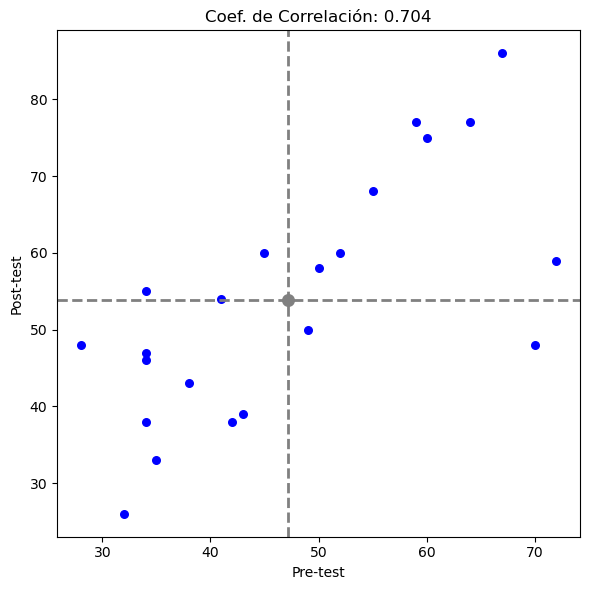

In [6]:
# Extraer columnas
x = Y_df["pre_test"]
y = Y_df["post_test"]

# Calcular medias y correlación
x_mean = np.mean(x)
y_mean = np.mean(y)
cor_xy = np.corrcoef(x, y)[0, 1]

# Configurar el gráfico
plt.figure(figsize=(6, 6))
plt.scatter(x, y, color='blue', s=30, label='Datos')  # pch = 16 ~ círculo sólido

# Líneas de referencia en las medias
plt.axvline(x=x_mean, color='gray', linestyle='--', linewidth=2)
plt.axhline(y=y_mean, color='gray', linestyle='--', linewidth=2)

# Punto en la media
plt.scatter(x_mean, y_mean, color='gray', s=70)

# Etiquetas
plt.xlabel("Pre-test")
plt.ylabel("Post-test")
plt.title(f"Coef. de Correlación: {cor_xy:.3f}")
plt.grid(False)
plt.tight_layout()
plt.show()

In [7]:
# Media por columna
yb = Y_df.mean().values  # vector de medias
print("Medias por columna:", np.round(yb, 1))

# Matriz de covarianzas muestral
SS = Y_df.cov().values
print("Matriz de covarianzas:")
print(np.round(SS, 1))

Medias por columna: [47.2 53.9]
Matriz de covarianzas:
[[182.2 148.4]
 [148.4 243.6]]


## Elicitación de lo hiperparámetros

El examen fue diseñado para otorgar puntajes con un promedio de 50 sobre 100, lo que define el vector de medias previas como $\boldsymbol{\mu}_0 = (50, 50)$.  

Se utiliza una varianza previa que asegura que $\textsf{Pr}(0 < \theta_j < 100) \approx 0.99$. Esto se logra fijando $\sigma^2_{0,1} = \sigma^2_{0,2} = \left(\frac{50}{3}\right)^2 \approx 278$.  

Adicionalmente, se establece una correlación previa de $\rho_0 = 0.5$, lo que implica que la covarianza previa es $\sigma_{0,12} = (0.5) \left(\frac{50}{3}\right)^2 \approx 139$.

$\nu_0 = 4$ se elige porque es el mínimo valor entero requerido para garantizar que $\textsf{E}(\mathbf{\Sigma})$ existe bajo una distribución Wishart Inversa.

$\mathbf{S}_0 = \mathbf{\Lambda}_0$ asegura consistencia con las suposiciones previas sobre $\mathbf{\Sigma}$.

In [9]:
# Previa
mu0 = np.array([50, 50])

L0 = np.array([[278, 139],
               [139, 278]])

nu0 = 4

S0 = np.array([[278, 139],
               [139, 278]])

## Ajuste del Modelo Normal Multivariado

In [11]:
# Semilla para reproducibilidad
np.random.seed(1234)

# Inicialización
Sigma = inv(wishart.rvs(df=nu0, scale=S0, random_state=1234))

# Número de muestras
B = 10000

# Almacenamiento
THETA = []
SIGMA = []
YS = []
LL = np.zeros(B)

# Estadísticos muestrales
yb = Y_df.mean().values
SS = Y_df.cov().values

# Cálculos previos
iL0 = inv(L0)
Lm0 = iL0 @ mu0
nun = nu0 + n
SSn = S0 + (n - 1) * SS

# Función para simular de la inversa-Wishart
def riwish(nu, S):
    W = wishart.rvs(df=nu, scale=inv(S))
    return inv(W)

# Muestreador de Gibbs
for b in tqdm(range(B), desc="Gibbs Sampling", ncols=80):
    # Actualización de theta
    iSigma = inv(Sigma)
    Ln = inv(iL0 + n * iSigma)
    theta_mean = Ln @ (Lm0 + n * (iSigma @ yb))
    theta = np.random.multivariate_normal(mean=theta_mean, cov=Ln)

    # Actualización de Sigma
    diff = yb - theta
    Sigma = riwish(nu=nun, S=SSn + n * np.outer(diff, diff))

    # Muestra de la predictiva posterior
    ys = np.random.multivariate_normal(mean=theta, cov=Sigma)
    YS.append(ys)

    # Log-verosimilitud
    ll = np.sum(multivariate_normal.logpdf(Y_df.values, mean=theta, cov=Sigma))
    LL[b] = ll

    # Almacenar resultados
    THETA.append(theta)
    SIGMA.append(Sigma.flatten())

# Convertir resultados a DataFrame
THETA = np.array(THETA)
SIGMA = np.array(SIGMA)
YS = np.array(YS)

theta_df = pd.DataFrame(THETA, columns=["theta1", "theta2"])
sigma_df = pd.DataFrame(SIGMA, columns=["sigma1^2", "sigma21", "sigma12", "sigma2^2"])
ys_df = pd.DataFrame(YS, columns=["y1_pred", "y2_pred"])

print("Simulación completada.")

Gibbs Sampling: 100%|███████████████████| 10000/10000 [00:01<00:00, 6437.73it/s]

Simulación completada.


## Convergencia

Se evalúa la convergencia del modelo por medio de los tamaños efectivos de muestra, los errores estándar y los coeficientes de variación: 


In [13]:
def effective_size(x, max_lag=1000):
    """
    Calcula el tamaño efectivo de muestra (ESS) siguiendo el criterio de Geyer,
    equivalente a coda::effectiveSize en R.

    Parámetros:
    - x: array unidimensional con la cadena MCMC.
    - max_lag: número máximo de retardos (por defecto 1000).

    Retorna:
    - ESS: tamaño efectivo de muestra.
    """
    x = np.asarray(x)
    n = len(x)
    x_centered = x - np.mean(x)
    var = np.var(x_centered, ddof=0)

    # Autocorrelaciones (biased estimator)
    acf = np.correlate(x_centered, x_centered, mode='full')[n-1:] / (var * n)
    acf = acf[:max_lag]

    # Geyer truncation: usar pares de autocorrelaciones mientras su suma sea positiva
    t = 1
    while t + 1 < len(acf) and (acf[t] + acf[t + 1]) > 0:
        t += 2

    # Suma truncada
    tau = 1 + 2 * np.sum(acf[1:t])
    ess = n / tau
    return ess

In [14]:
# Combinar cadenas en un DataFrame
samples = np.hstack([THETA, SIGMA])  # matriz B x 6
colnames = ["theta1", "theta2", "sigma1^2", "sigma21", "sigma12", "sigma2^2"]
samples_df = pd.DataFrame(samples, columns=colnames)

# Calcular ESS, EMC y CVMC
neff = np.array([effective_size(samples_df[col].values) for col in colnames])
sd = samples_df.std(axis=0, ddof=1).values
means = samples_df.mean(axis=0).values
EMC = sd / np.sqrt(neff)
CVMC = 100 * EMC / np.abs(means)

# Mostrar resultados
summary_df = pd.DataFrame({
    "ESS": np.round(neff),
    "EMC": np.round(EMC, 4),
    "CVMC (%)": np.round(CVMC, 4)
}, index=colnames)

print(summary_df)

              ESS     EMC  CVMC (%)
theta1    10000.0  0.0284    0.0601
theta2    10000.0  0.0324    0.0603
sigma1^2   9119.0  0.6074    0.3268
sigma21    8901.0  0.6159    0.4170
sigma12    8901.0  0.6159    0.4170
sigma2^2   8935.0  0.8332    0.3394


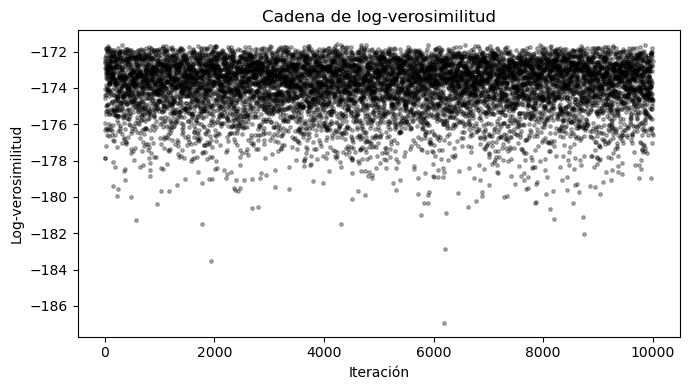

In [15]:
# Gráfico de la cadena de la log-verosimilitud
plt.figure(figsize=(7, 4))  # Tamaño opcional del gráfico
plt.plot(LL, 'o', markersize=2.5, color=(0, 0, 0, 0.3))  # puntos negros con alpha = 0.3

plt.xlabel("Iteración")
plt.ylabel("Log-verosimilitud")
plt.title("Cadena de log-verosimilitud")
plt.grid(False)
plt.tight_layout()
plt.show()

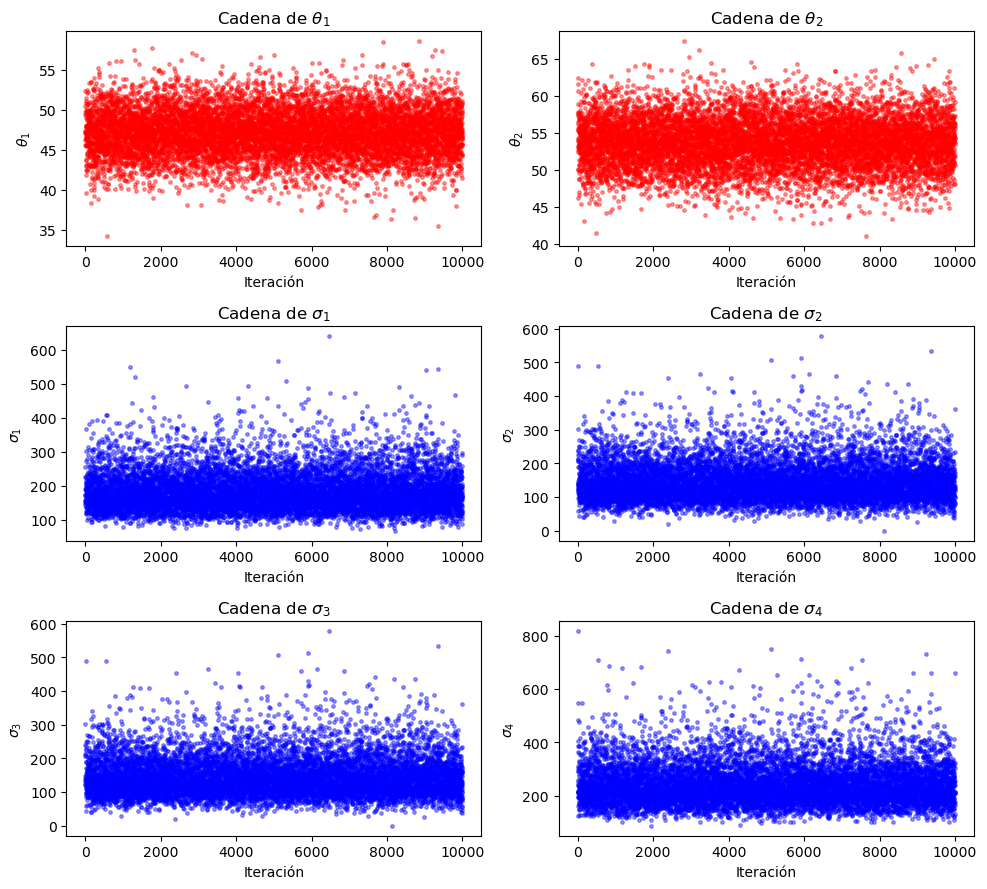

In [16]:
# Configurar el panel de 3x2 subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 9))
axes = axes.flatten()  # Para indexar fácilmente

# Trazar THETA[:, 0] y THETA[:, 1] en rojo
for j in range(2):
    axes[j].plot(THETA[:, j], 'o', markersize=2.5, color=(1, 0, 0, 0.4))  # rojo con transparencia
    axes[j].set_xlabel("Iteración")
    axes[j].set_ylabel(f"$\\theta_{{{j+1}}}$")
    axes[j].set_title(f"Cadena de $\\theta_{{{j+1}}}$")

# Trazar SIGMA[:, 0:4] en azul
for j in range(4):
    axes[j + 2].plot(SIGMA[:, j], 'o', markersize=2.5, color=(0, 0, 1, 0.4))  # azul con transparencia
    axes[j + 2].set_xlabel("Iteración")
    axes[j + 2].set_ylabel(f"$\\sigma_{{{j+1}}}$")
    axes[j + 2].set_title(f"Cadena de $\\sigma_{{{j+1}}}$")

plt.tight_layout()
plt.show()

## Inferencia

Distribución posterior de $\boldsymbol{\theta}$ y distribución predictiva posterior:

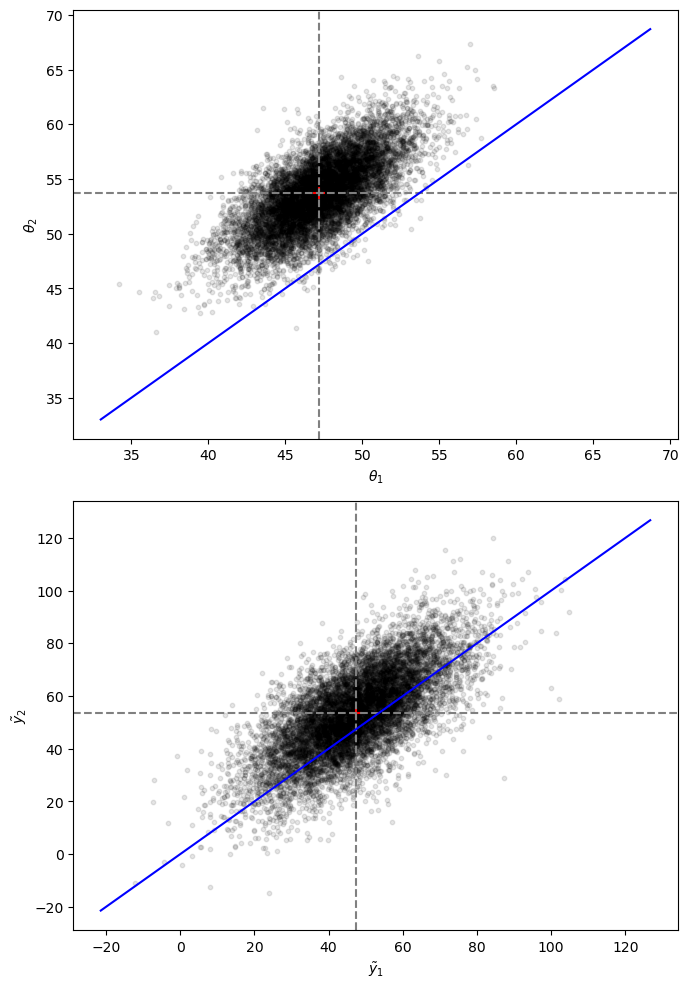

In [18]:
# Configurar el panel de 2 filas, 1 columna
fig, axes = plt.subplots(2, 1, figsize=(7, 10))
plt.subplots_adjust(hspace=0.4)  # Espacio vertical entre subplots

# ========== Gráfico 1: theta2 vs theta1 ==========
ax = axes[0]
ax.scatter(THETA[:, 0], THETA[:, 1], s=10, color=(0, 0, 0, 0.1))

# Líneas en la media
ax.axvline(np.mean(THETA[:, 0]), color="gray", linestyle="--")
ax.axhline(np.mean(THETA[:, 1]), color="gray", linestyle="--")

# Punto en la media
ax.scatter(np.mean(THETA[:, 0]), np.mean(THETA[:, 1]), marker="+", color="red", s=80)

# Línea diagonal
xlim = ax.get_xlim()
ylim = ax.get_ylim()
lims = [min(xlim[0], ylim[0]), max(xlim[1], ylim[1])]
ax.plot(lims, lims, color="blue")  # Diagonal

# Etiquetas
ax.set_xlabel(r"$\theta_1$")
ax.set_ylabel(r"$\theta_2$")
ax.set_title("")

# ========== Gráfico 2: y*_2 vs y*_1 ==========
ax = axes[1]
ax.scatter(YS[:, 0], YS[:, 1], s=10, color=(0, 0, 0, 0.1))

# Líneas en la media
ax.axvline(np.mean(YS[:, 0]), color="gray", linestyle="--")
ax.axhline(np.mean(YS[:, 1]), color="gray", linestyle="--")

# Punto en la media
ax.scatter(np.mean(YS[:, 0]), np.mean(YS[:, 1]), marker="+", color="red", s=80)

# Línea diagonal
xlim = ax.get_xlim()
ylim = ax.get_ylim()
lims = [min(xlim[0], ylim[0]), max(xlim[1], ylim[1])]
ax.plot(lims, lims, color="blue")  # Diagonal

# Etiquetas
ax.set_xlabel(r"$\tilde{y}_1$")
ax.set_ylabel(r"$\tilde{y}_2$")
ax.set_title("")

plt.tight_layout()
plt.show()

Inferencia sobre $\theta_2 - \theta_1$:

¿Cuál es la probabilidad posterior de que la calificación promedio del segundo examen sea mayor que la del primero?

In [20]:
# Diferencias theta2 - theta1
diff_theta = THETA[:, 1] - THETA[:, 0]

# Probabilidad posterior de que theta2 > theta1
prob_theta2_gt_theta1 = np.round(np.mean(diff_theta > 0), 4)
print("P(theta2 > theta1) =", prob_theta2_gt_theta1)

# Cuantiles de la diferencia posterior
quantiles = np.round(np.quantile(diff_theta, [0.025, 0.5, 0.975]), 4)
print("Quantiles (2.5%, 50%, 97.5%) de theta2 - theta1:", quantiles)

P(theta2 > theta1) = 0.9944
Quantiles (2.5%, 50%, 97.5%) de theta2 - theta1: [ 1.732   6.5532 11.1817]


Inferencia sobre $\tilde{y}_2 - \tilde{y}_1$:

¿Cuál es la probabilidad posterior de que un niño seleccionado al azar obtenga una puntuación más alta en el segundo examen que en el primero?

In [22]:
# Diferencias y*_2 - y*_1
diff_y = YS[:, 1] - YS[:, 0]

# Probabilidad de mejora (y2 > y1)
prob_y2_gt_y1 = np.round(np.mean(diff_y > 0), 4)
print("P(y2 > y1) =", prob_y2_gt_y1)

# Cuantiles de la diferencia predictiva
quantiles_y = np.round(np.quantile(diff_y, [0.025, 0.5, 0.975]), 4)
print("Quantiles (2.5%, 50%, 97.5%) de y2 - y1:", quantiles_y)

P(y2 > y1) = 0.7091
Quantiles (2.5%, 50%, 97.5%) de y2 - y1: [-17.3731   6.3422  29.3053]


Inferencia sobre $\rho=\frac{\sigma_{1,2}}{\sigma_{1}\,\sigma_{2}}$:

¿Las pruebas son consistentes? ¿Cuál es la probabilidad posterior de que la correlación entre las calificaciones sea superior a 0.6?

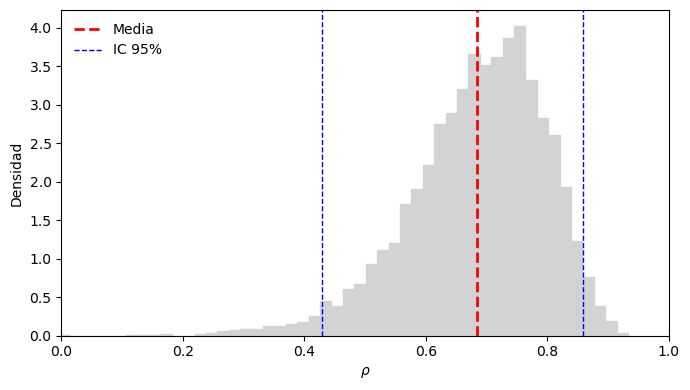

In [24]:
# Calcular muestras de rho
RHO = SIGMA[:, 1] / np.sqrt(SIGMA[:, 0] * SIGMA[:, 3])  # sigma21 / sqrt(sigma1^2 * sigma2^2)

# Crear histograma
plt.figure(figsize=(7, 4))
plt.hist(RHO, bins=50, density=True, color="lightgray", edgecolor="lightgray")
plt.xlim(0, 1)
plt.xlabel(r"$\rho$")
plt.ylabel("Densidad")
plt.title("")

# Líneas verticales: media y cuantiles 2.5% y 97.5%
plt.axvline(np.mean(RHO), color="red", linestyle="--", linewidth=2)
plt.axvline(np.quantile(RHO, 0.025), color="blue", linestyle="--", linewidth=1)
plt.axvline(np.quantile(RHO, 0.975), color="blue", linestyle="--", linewidth=1)

# Leyenda
plt.legend(["Media", "IC 95%"], loc="upper left", frameon=False, fontsize=10)

plt.tight_layout()
plt.show()

In [25]:
# Probabilidad posterior de que rho > 0.5
prob_rho_gt_05 = np.round(np.mean(RHO > 0.5), 4)
print("P(rho > 0.5) =", prob_rho_gt_05)

# Cuantiles de rho (2.5%, 50%, 97.5%)
quantiles_rho = np.round(np.quantile(RHO, [0.025, 0.5, 0.975]), 4)
print("Quantiles (2.5%, 50%, 97.5%) de rho:", quantiles_rho)

P(rho > 0.5) = 0.9375
Quantiles (2.5%, 50%, 97.5%) de rho: [0.4292 0.6975 0.8584]


## Bondad de ajuste

Se evalúa la bondad de ajuste del modelo tomando como estadísticos de prueba la diferencia de medias y el coeficiente de correlación:


In [27]:
# Matriz para almacenar los estadísticos
TS = np.full((B, 2), np.nan)

np.random.seed(123)
for b in range(B):
    # Simular datos replicados
    Sigma_b = SIGMA[b, :].reshape(p, p)
    Yrep = np.random.multivariate_normal(mean=THETA[b, :], cov=Sigma_b, size=n)

    # Estadísticos: diferencia de medias y correlación
    stat1 = np.mean(Yrep[:, 1]) - np.mean(Yrep[:, 0])
    stat2 = np.corrcoef(Yrep[:, 0], Yrep[:, 1])[0, 1]
    TS[b, :] = [stat1, stat2]

# Estadísticos observados
obs_diff_mean = np.mean(Y_df["post_test"]) - np.mean(Y_df["pre_test"])
obs_cor = np.corrcoef(Y_df["pre_test"], Y_df["post_test"])[0, 1]

# Valores ppp
ppp = np.array([
    np.mean(TS[:, 0] < obs_diff_mean),
    np.mean(TS[:, 1] < obs_cor)
])

# Mostrar resultados
print("Posterior predictive p-values (ppp):")
print(f"Diferencia de medias: {np.round(ppp[0], 4)}")
print(f"Correlación:          {np.round(ppp[1], 4)}")

Posterior predictive p-values (ppp):
Diferencia de medias: 0.5175
Correlación:          0.4962


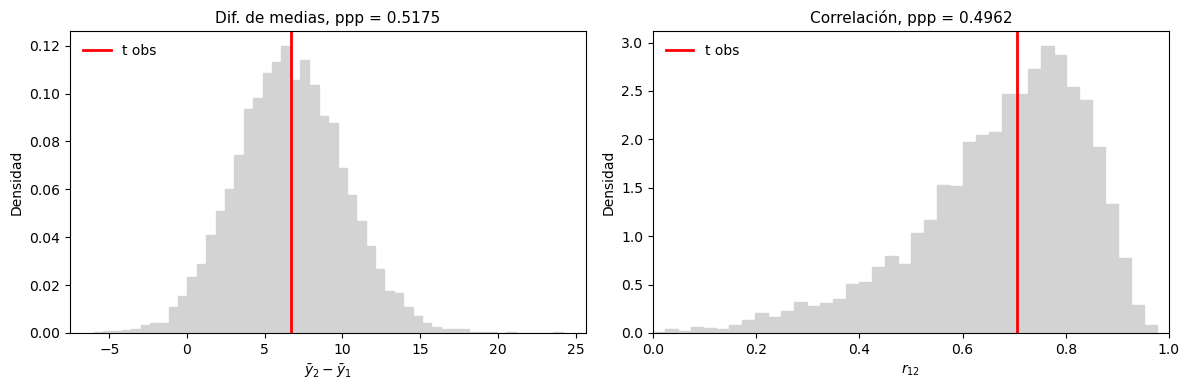

In [28]:
# Estadísticos observados
obs_diff_mean = np.mean(Y_df["post_test"]) - np.mean(Y_df["pre_test"])
obs_cor = np.corrcoef(Y_df["pre_test"], Y_df["post_test"])[0, 1]

# Configuración del panel de gráficos 1 x 2
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plt.subplots_adjust(wspace=0.3)

# Histograma: diferencia de medias
ax = axes[0]
ax.hist(TS[:, 0], bins=50, density=True, color="lightgray", edgecolor="lightgray")
ax.axvline(obs_diff_mean, color="red", linewidth=2)
ax.set_xlabel(r"$\bar{y}_2 - \bar{y}_1$")
ax.set_ylabel("Densidad")
ax.set_title(f"Dif. de medias, ppp = {ppp[0]:.4f}", fontsize=11)
ax.legend(["t obs"], loc="upper left", frameon=False)

# Histograma: correlación
ax = axes[1]
ax.hist(TS[:, 1], bins=50, density=True, color="lightgray", edgecolor="lightgray")
ax.axvline(obs_cor, color="red", linewidth=2)
ax.set_xlim(0, 1)
ax.set_xlabel(r"$r_{12}$")
ax.set_ylabel("Densidad")
ax.set_title(f"Correlación, ppp = {ppp[1]:.4f}", fontsize=11)
ax.legend(["t obs"], loc="upper left", frameon=False)

plt.tight_layout()
plt.show()

# Ejercicios

- La distribución previa de Jeffreys para el modelo Normal multivariado es:
    $$
    p_J(\boldsymbol{\theta}, \mathbf{\Sigma}) \propto |\mathbf{\Sigma}|^{-(p+2)/2}.
    $$  

    - Explique por qué la función $p_J$ no es una densidad de probabilidad válida para $(\boldsymbol{\theta}, \mathbf{\Sigma})$. 
    - Determine la distribución posterior de $\boldsymbol{\theta}$ y $\mathbf{\Sigma}$.
    - Determine la distribución condicional completa de $\boldsymbol{\theta}$.
    - Determine la distribución condicional completa de $\mathbf{\Sigma}$.

- Sea $\mathbf{\Omega} = \mathbf{\Sigma}^{-1}$ la matriz de precisión del modelo Normal multivariado. 

    - Demuestre que una distribución previa de información unitaria para $(\boldsymbol{\theta}, \mathbf{\Omega})$ está dada por $\boldsymbol{\theta} \mid \mathbf{\Omega} \sim \textsf{N}(\bar{\boldsymbol{y}}, \mathbf{\Omega}^{-1})$ y $\mathbf{\Omega} \sim \textsf{W}(p+1, \mathbf{S}^{-1})$, donde $\mathbf{S} = \frac{1}{n} \sum_{i=1}^{n} (\boldsymbol{y}_i - \bar{\boldsymbol{y}})(\boldsymbol{y}_i - \bar{\boldsymbol{y}})^{\textsf{T}}$ es la matriz de covarianza muestral.  
     
    Para demostrarlo, note que la distribución previa de información unitaria satisface $p_U(\boldsymbol{\theta}, \mathbf{\Omega}) = p_U(\boldsymbol{\theta} \mid \mathbf{\Omega}) \, p_U(\mathbf{\Omega})$, donde  
    $$
    \log p_U(\boldsymbol{\theta}, \mathbf{\Omega}) = \frac{1}{n} \ell(\boldsymbol{\theta}, \mathbf{\Omega} \mid \boldsymbol{y}_1,\ldots,\boldsymbol{y}_n) + \text{c},
    $$  
    siendo $\ell(\boldsymbol{\theta}, \mathbf{\Omega} \mid \boldsymbol{y}_1,\ldots,\boldsymbol{y}_n)$ la log-verosimilitud reparametrizada en términos de $\mathbf{\Omega}$, y $\text{c}$ una constante. Además, recuerde que $(\boldsymbol{y}_i - \boldsymbol{\theta}) = (\boldsymbol{y}_i - \bar{\boldsymbol{y}}) + (\bar{\boldsymbol{y}} - \boldsymbol{\theta})$, y que una expresión de la forma $\sum_{i=1}^n \boldsymbol{a}_i^{\textsf{T}} \mathbf{B} \boldsymbol{a}_i$ se puede escribir como $\textsf{tr}(\mathbf{B} \mathbf{A})$, donde $\mathbf{A} = \sum_{i=1}^n \boldsymbol{a}_i \boldsymbol{a}_i^{\textsf{T}}$.
     
    - Sea $p_U(\mathbf{\Sigma})$ la densidad **inversa-Wishart** inducida por $p_U(\mathbf{\Omega})$. Obtenga una densidad proporcional a  
    $$
    p_U(\boldsymbol{\theta}, \mathbf{\Sigma} \mid \boldsymbol{y}_1, \dots, \boldsymbol{y}_n) \propto p(\boldsymbol{y}_1, \dots, \boldsymbol{y}_n \mid \boldsymbol{\theta}, \mathbf{\Sigma}) \, p_U(\boldsymbol{\theta} \mid \mathbf{\Sigma}) \, p_U(\mathbf{\Sigma}) .
    $$  

- Los archivos `bluecrab.dat` y `orangecrab.dat` contienen mediciones en milímetros de la profundidad del cuerpo ($y_1$) y el ancho posterior ($y_2$) de 50 cangrejos machos de cada una de las dos especies: azul y naranja. Se modelarán estos datos utilizando una distribución Normal bivariada.

    - Para cada una de las dos especies, obtenga las distribuciones posteriores del vector de medias poblacional $\boldsymbol{\theta}$ y la matriz de covarianza $\mathbf{\Sigma}$ utilizando distribuciones previas semiconjugadas. Fije $\boldsymbol{\mu}_0$ como la media muestral de los datos, $\mathbf{\Lambda}_0$ y $\mathbf{S}_0$ como la matriz de covarianza muestral, y establezca $\nu_0 = 4$. Genere 10,000 muestras posteriores de $\boldsymbol{\theta}$ y $\mathbf{\Sigma}$. Realice un análisis exhaustivo de convergencia.
     
    Cabe notar que esta elección de distribución previa centra los parámetros alrededor de estimaciones empíricas obtenidas a partir de los datos observados, similar a la distribución previa de información unitaria. Sin embargo, dado que se deriva de los datos observados, no se puede considerar una distribución previa genuina, aunque sí como una distribución previa que refleja una información inicial débil pero no sesgada.
          
    - Represente gráficamente la posterior de $\boldsymbol{\theta} = (\theta_{\text{azul}}, \theta_{\text{naranja}})$ para cada grupo y compárelos. Analice y describa cualquier diferencia en el tamaño entre las dos especies.
     
    - A partir de cada matriz de covarianza obtenida mediante el muestreador de Gibbs, calcule el coeficiente de correlación correspondiente. Con estos valores, represente las densidades posteriores de las correlaciones $\rho_{\text{azul}}$ y $\rho_{\text{naranja}}$ para ambos grupos. Evalúe las diferencias entre las dos especies comparando estas distribuciones posteriores. En particular, estime la probabilidad $\textsf{Pr}(\rho_{\text{azul}} < \rho_{\text{naranja}} \mid \boldsymbol{y}_{\text{azul}}, \boldsymbol{y}_{\text{naranja}})$. Interprete los resultados y analice qué sugieren sobre las diferencias entre ambas poblaciones.
     
- El archivo `agehw.dat` contiene información sobre las edades de 100 parejas casadas seleccionadas de una muestra representativa de la población de EE.UU.

    - Antes de examinar los datos, utilice su estado de información para formular una distribución previa semiconjugada para $\boldsymbol{\theta} = (\theta_H, \theta_W)^{\textsf{T}}$ y $\mathbf{\Sigma}$, donde $\theta_H$ y $\theta_W$ representan las edades promedio de los esposos y esposas, respectivamente, y $\mathbf{\Sigma}$ es la matriz de covarianza.
     
    - Genere un conjunto de datos simulados de tamaño $n = 100$ a partir de la distribución predictiva previa, muestreando primero $(\boldsymbol{\theta}, \mathbf{\Sigma})$ de la distribución previa y luego simulando $\boldsymbol{y}_1, \dots, \boldsymbol{y}_n \sim \textsf{N}(\boldsymbol{\theta}, \mathbf{\Sigma})$ de manera independiente. Repita este procedimiento varias veces, genere diagramas de dispersión bivariados para cada conjunto de datos simulado y verifique si representan razonablemente sus creencias previas sobre cómo debería lucir un conjunto de datos real. Si los datos simulados no reflejan adecuadamente sus creencias, regrese al apartado anterior y reformule una nueva distribución previa. Finalmente, reporte la distribución previa elegida y presente diagramas de dispersión de al menos tres conjuntos de datos generados a partir de la distribución predictiva previa.
     
    - Utilizando la distribución previa y los 100 valores del conjunto de datos, obtenga una aproximación MCMC a la distribución posterior $p(\boldsymbol{\theta}, \mathbf{\Sigma} \mid \boldsymbol{y}_1, \dots, \boldsymbol{y}_{100})$. Represente gráficamente la distribución conjunta posterior de $\theta_H$ y $\theta_W$, así como la densidad marginal posterior del coeficiente de correlación entre $y_H$ y $y_W$, que representan las edades de los esposos y esposas, respectivamente. Además, calcule los intervalos de credibilidad posteriores del 95% para $\theta_H$, $\theta_W$ y el coeficiente de correlación.
     
    - Calcule los intervalos de credibilidad posteriores del 95% para $\theta_H$, $\theta_W$ y el coeficiente de correlación utilizando las siguientes distribuciones previas:  
     
        - La previa de Jeffreys.
        - La previa de información unitaria.
        - Una previa difusa semiconjugada, con $\boldsymbol{\mu}_0 = \mathbf{0}$, $\mathbf{\Lambda}_0 = 10^5 \times \mathbf{I}$, $\mathbf{S}_0 = 1000 \times \mathbf{I}$ y $\nu_0 = 3$.
          
    - Compare los intervalos de credibilidad obtenidos en el inciso d. con aquellos calculados en el inciso c. Analice si la información previa utilizada resulta útil para la estimación de $\boldsymbol{\theta}$ y $\mathbf{\Sigma}$, o si alguna de las alternativas en d. es más adecuada. Además, considere el impacto de un tamaño muestral mucho menor, por ejemplo, $n = 25$, y discuta cómo esto afectaría la influencia de la distribución previa en la estimación.

# Referencias

Hoff, P. D. (2009). ***A First Course in Bayesian Statistical Methods***. Springer New York.

Gelman, A., Carlin, J. B., Stern, H. S., Dunson, D. B., Vehtari, A., & Rubin, D. B. (2013). ***Bayesian Data Analysis*** (3rd ed.). Chapman & Hall/CRC.